## Setup

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [180]:
df = pd.read_csv('../data/cleaned.csv')
df

,AfterProbiotic,(12 or 13)-methylmyristate (a15:0 or i15:0),(14 or 15)-methylpalmitate (a17:0 or i17:0),(16 or 17)-methylstearate (a19:0 or i19:0),(3'-5')-adenylyladenosine*,(3'-5')-adenylylcytidine,(3'-5')-adenylyluridine,(3'-5')-cytidylylcytidine*,(3'-5')-cytidylylguanosine,(3'-5')-cytidylyluridine*,...,sedoheptulose,suberate (C8-DC),succinate,succinimide,threonate,tricarballylate,urate,xylose,mouseID,isMale
0,0,0.097699,0.031264,0.011751,0.002530,0.001595,0.002532,0.002700,0.001522,0.002641,...,0.040729,0.024735,0.347333,0.021981,0.155677,0.241432,0.048367,0.149068,1,1
1,1,0.158941,0.033450,0.010874,0.000659,0.000659,0.000659,0.000659,0.000659,0.001236,...,0.034188,0.042743,0.374643,0.033852,0.088292,0.078611,0.044431,0.180184,1,1
2,0,0.119596,0.034288,0.011585,0.001485,0.000785,0.001638,0.001818,0.000785,0.001973,...,0.060845,0.033103,0.286650,0.030653,0.116940,0.197009,0.045180,0.168328,2,1
3,1,0.130916,0.037041,0.015447,0.000921,0.000921,0.000921,0.000921,0.000921,0.000921,...,0.091777,0.035994,0.442962,0.022208,0.078139,0.105422,0.032510,0.140046,2,1
4,0,0.103788,0.037460,0.014543,0.002526,0.002436,0.002764,0.003566,0.000709,0.003389,...,0.034373,0.032385,0.286454,0.028730,0.195996,0.328468,0.057677,0.072740,3,1
5,1,0.154498,0.036943,0.014053,0.003345,0.002256,0.003578,0.003453,0.002385,0.003525,...,0.058926,0.044877,0.361670,0.031210,0.124713,0.139020,0.063091,0.093225,3,1
6,0,0.178249,0.040164,0.015899,0.003001,0.002235,0.003103,0.003046,0.000941,0.003117,...,0.021816,0.030599,0.344763,0.029454,0.153957,0.253468,0.063587,0.118900,4,0
7,1,0.111626,0.030752,0.011096,0.000832,0.000832,0.000832,0.000832,0.000832,0.000832,...,0.021584,0.033518,0.245637,0.020587,0.185380,0.159851,0.082961,0.101554,4,0
8,0,0.160207,0.038966,0.013056,0.002832,0.001893,0.003246,0.000934,0.000934,0.002383,...,0.026331,0.027682,0.240438,0.023459,0.121336,0.197046,0.052422,0.287363,5,0
9,1,0.129253,0.031197,0.011793,0.001061,0.001061,0.001061,0.003476,0.001061,0.003567,...,0.023904,0.030442,0.216346,0.024343,0.199169,0.174640,0.081636,0.055060,5,0


In [181]:
# run only if jupyterthemes installed

# import jtplot module in notebook
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')
# jtplot.reset()

## PCA

In [182]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
components = pca.fit_transform(df.iloc[:, 1:-2])
pcaDF = pd.DataFrame(data = components
             , columns = ['PC1', 'PC2', 'PC3'])
pcaDFPlot = pd.concat([pcaDF, df['AfterProbiotic'].map({True : "Week 12", False : "Day 7"})], axis=1)
pcaDFPlot

,PC1,PC2,PC3,AfterProbiotic
0,-0.009878,-0.057891,0.255122,Day 7
1,0.334080,-0.063522,-0.010947,Week 12
2,0.136396,-0.044269,0.235231,Day 7
3,0.530867,-0.106464,-0.159191,Week 12
4,-0.291148,-0.078228,0.128555,Day 7
5,0.197594,-0.148634,-0.098439,Week 12
6,-0.117286,0.303090,-0.115930,Day 7
7,-0.345870,-0.135466,-0.063288,Week 12
8,0.018531,0.484733,0.005153,Day 7
9,-0.453286,-0.153350,-0.176267,Week 12


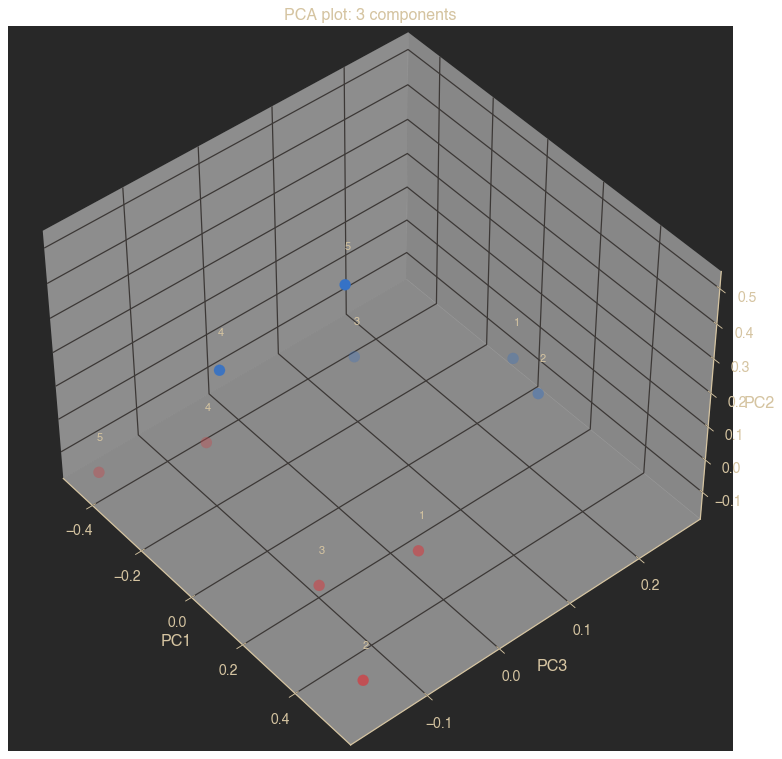

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# plt.style.use('dark_background')

fig = plt.figure(figsize=(12, 12), dpi=80)
ax = fig.add_subplot(projection='3d')


col = np.where(df['AfterProbiotic'],'r', 'b')
ax.scatter(xs=pcaDF['PC1'], ys=pcaDF['PC3'], zs=pcaDF['PC2'], c=col, s=100)

ax.set_xlabel('PC1')
ax.set_ylabel('PC3')
ax.set_zlabel('PC2')
ax.set_zlim(min(pcaDF['PC2']) * 1.1, max(pcaDF['PC2']) * 1.1)
ax.set_xlim(min(pcaDF['PC1']) * 1.1, max(pcaDF['PC1']) * 1.1)
ax.set_ylim(min(pcaDF['PC3']) * 1.1, max(pcaDF['PC3']) * 1.1)

# set view angle
ax.view_init(elev=45., azim=320)


# label samples

xs=pcaDF['PC1']
ys=pcaDF['PC3']
zs=pcaDF['PC2']

for i in range(10):
    label = i // 2 + 1
    ax.text(xs[i], ys[i], zs[i] + 0.1, label)
ax.title.set_text("PCA plot: 3 components")

#### 3d plot is a bit ugly ^

In [184]:
from scipy import interpolate
from scipy.spatial import ConvexHull

# https://stackoverflow.com/a/44577682/14772896
# https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    x_hull = x[hull.vertices]
    y_hull = y[hull.vertices]
    # ax.fill(x_hull, y_hull, **kw)
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', **kw)

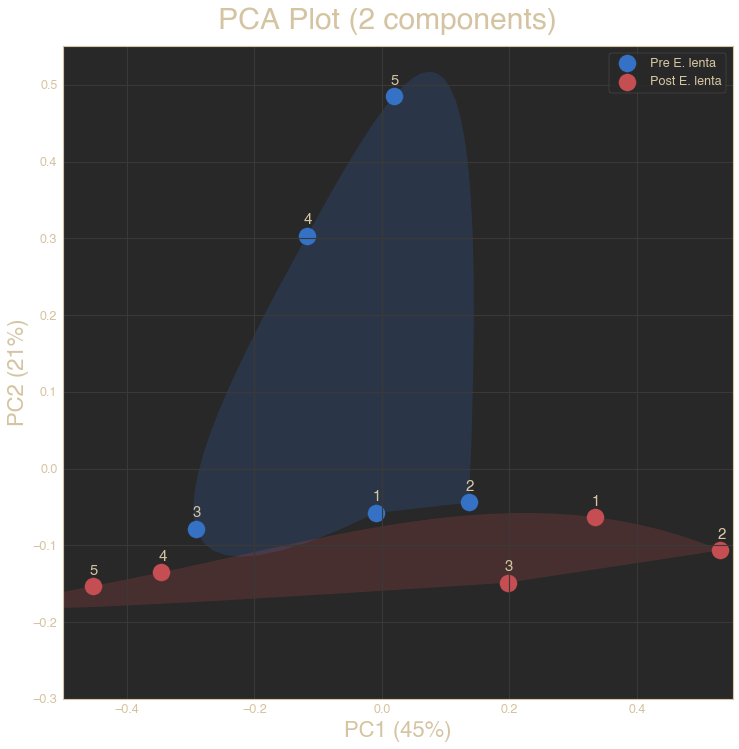

In [185]:
fig = plt.figure(figsize=(12,12))
before = components[(0, 2, 4, 6, 8), :]
after = components[(1, 3, 5, 7, 9), :]
plt.scatter(before[:, 0], before[:, 1], c='b', s=300, label='Pre E. lenta')
plt.scatter(after[:, 0], after[:, 1], c='r', s=300, label='Post E. lenta')
encircle(before[:, 0], before[:, 1], alpha=0.2, c='b')
encircle(after[:, 0], after[:, 1], alpha=0.2, c='r')

pca1_ratio, pca2_ratio = pca.explained_variance_ratio_[:2]
font = {'weight' : 'bold', 'size' : 22}
plt.xlabel('PC1 ({:.0%})'.format(pca1_ratio), font=font)
plt.ylabel('PC2 ({:.0%})'.format(pca2_ratio), font=font)

ax = plt.gca()
ax.set_xlim(-0.5, 0.55)
ax.set_ylim(-0.3, 0.55)

for i in range(10):
    label = i // 2 + 1
    plt.text(xs[i] - 0.005, zs[i] + 0.015, label, font = {
        'weight' : 'bold',
        'size'   : 15
    })
plt.legend()
plt.figtext(.5,.9,'PCA Plot (2 components)',fontsize=30,ha='center')
plt.savefig('../output/pca.png')

## Multidimentional Scaling

In [186]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=16)
mds_components = mds.fit_transform(df.iloc[:, 1:-2])
mds_components

array([[-0.02178377, -0.04214958],
       [ 0.35814851, -0.17171985],
       [ 0.19019231,  0.0713914 ],
       [ 0.62883104, -0.08641321],
       [-0.38953615,  0.10101405],
       [ 0.17192759, -0.31925817],
       [-0.19249032,  0.3990581 ],
       [-0.38529654, -0.16811152],
       [ 0.12747578,  0.52710899],
       [-0.48746846, -0.31092022]])

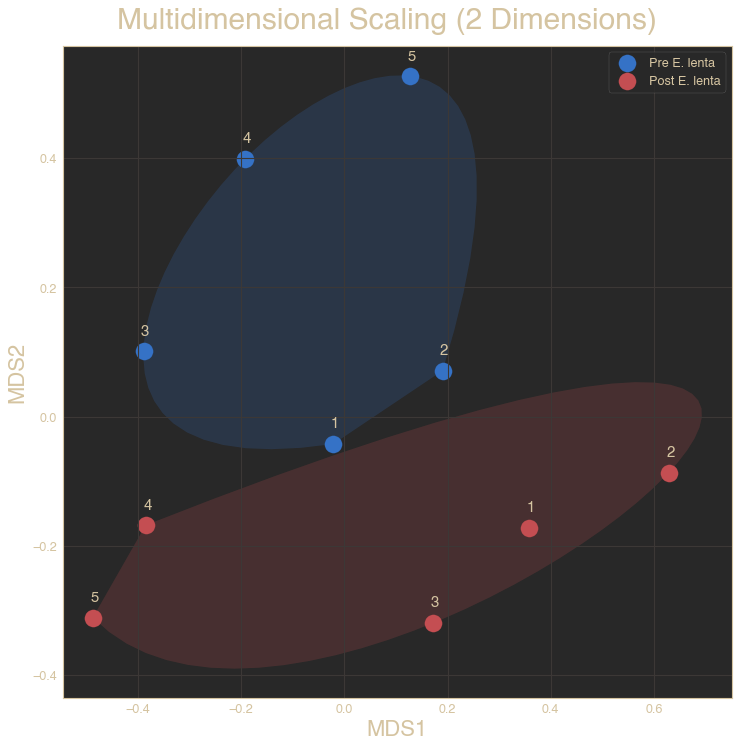

In [187]:
fig = plt.figure(figsize=(12,12))
before = mds_components[(0, 2, 4, 6, 8), :]
after = mds_components[(1, 3, 5, 7, 9), :]
plt.scatter(before[:, 0], before[:, 1], c='b', s=300, label='Pre E. lenta')
plt.scatter(after[:, 0], after[:, 1], c='r', s=300, label='Post E. lenta')
encircle(before[:, 0], before[:, 1], alpha=0.2, c='b')
encircle(after[:, 0], after[:, 1], alpha=0.2, c='r')


font = {'weight' : 'bold', 'size' : 22}
plt.xlabel('MDS1', font=font)
plt.ylabel('MDS2', font=font)

ax = plt.gca()

for i in range(10):
    label = i // 2 + 1
    plt.text(mds_components[i, 0] - 0.005, mds_components[i, 1] + 0.025, label, font = {
        'weight' : 'bold',
        'size'   : 15
    })
plt.legend()
plt.figtext(.5,.9,'Multidimensional Scaling (2 Dimensions)',fontsize=30,ha='center')
plt.savefig('../output/MDS.png')

## Hierarchical Clustering

In [206]:
cluster_df = df.iloc[:, 1:-2].T
cluster_df = cluster_df.rename(
    mapper=(lambda x : ((x + 2) // 2)), axis=1)
cluster_df.index = range(823)
cluster_df.index.name = '\n823 Metabolites'
cluster_df

,1,1,2,2,3,3,4,4,5,5
823 Metabolites,,,,,,,,,,
0,0.097699,0.158941,0.119596,0.130916,0.103788,0.154498,0.178249,0.111626,0.160207,0.129253
1,0.031264,0.033450,0.034288,0.037041,0.037460,0.036943,0.040164,0.030752,0.038966,0.031197
2,0.011751,0.010874,0.011585,0.015447,0.014543,0.014053,0.015899,0.011096,0.013056,0.011793
3,0.002530,0.000659,0.001485,0.000921,0.002526,0.003345,0.003001,0.000832,0.002832,0.001061
4,0.001595,0.000659,0.000785,0.000921,0.002436,0.002256,0.002235,0.000832,0.001893,0.001061
...,...,...,...,...,...,...,...,...,...,...
818,0.021981,0.033852,0.030653,0.022208,0.028730,0.031210,0.029454,0.020587,0.023459,0.024343
819,0.155677,0.088292,0.116940,0.078139,0.195996,0.124713,0.153957,0.185380,0.121336,0.199169
820,0.241432,0.078611,0.197009,0.105422,0.328468,0.139020,0.253468,0.159851,0.197046,0.174640


In [207]:
import seaborn as snb
methods = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']

In [208]:
def hierarchical(data, title, filename, tick):
    fig = plt.figure(figsize=(12, 12))

    ax = snb.clustermap(data, robust=True, cmap="mako", 
                        col_colors=['r', 'b']*10,
                        metric='chebyshev', z_score=1,
                        dendrogram_ratio=(.1, .2),
                        cbar_pos=(-0.15, .2, .05, .4),
                        tree_kws = {'colors' : (1, 1, 1)},
                        yticklabels=tick,
                       )
    ax.cax.set_title("High Abundance")
    plt.xlabel('Low Abundance')
    plt.ylabel('Scaled Metabolite Abundance')

    plt.figtext(.5, 1,title,fontsize=30,ha='center')
    plt.figtext(.48, -0.02,'Mouse ID',fontsize=15,ha='center')

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='b', edgecolor='b', label='Pre E. lenta'),
        Patch(facecolor='r', edgecolor='r', label='Post E. lenta')
                      ]

    plt.legend(handles=legend_elements, bbox_to_anchor=(-1, 1.52), loc='upper left')

    plt.show()
    ax.savefig('../output/' + filename)
    

<Figure size 864x864 with 0 Axes>

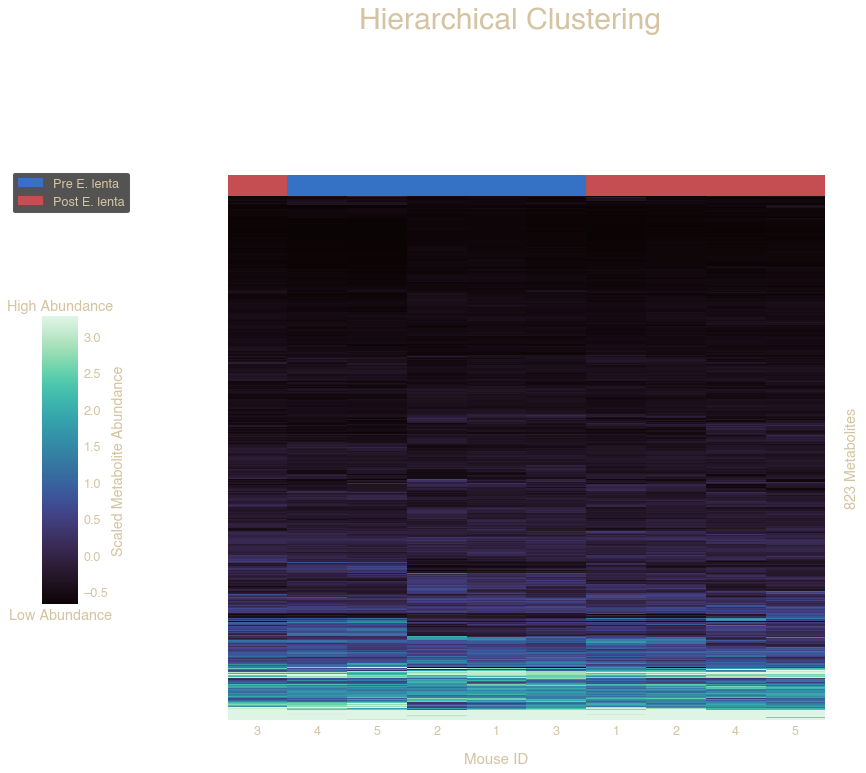

In [209]:
hierarchical(cluster_df, 'Hierarchical Clustering', 'HC_all.png', tick=False)

### Hierarchical Clustering with high variance features

In [210]:
variances = cluster_df.var(axis=1).sort_values(ascending=False)
variances

\n823 Metabolites
777    1.112193e-02
549    8.192011e-03
785    7.720446e-03
752    6.470883e-03
820    5.465280e-03
           ...     
7      2.698471e-07
287    2.290626e-07
160    1.470955e-07
34     1.124059e-07
141    9.561756e-08
Length: 823, dtype: float64

In [211]:
top10 = variances[:int(len(variances) * 0.1)].index.values
cluster_df_top10 = cluster_df.iloc[top10, :]
cluster_df_top10.index.name = '\n82 Metabolites'
cluster_df_top10.head()

,1,1,2,2,3,3,4,4,5,5
82 Metabolites,,,,,,,,,,
777,0.388174,0.379516,0.396896,0.474239,0.227633,0.393175,0.200966,0.263762,0.211053,0.179118
549,0.138372,0.001097,0.001452,0.001178,0.120858,0.006964,0.089264,0.195528,0.067820,0.258272
785,0.271211,0.249669,0.238634,0.188524,0.123175,0.186219,0.302018,0.169700,0.425963,0.158792
752,0.112612,0.096876,0.097459,0.041999,0.156780,0.130044,0.094367,0.277683,0.074011,0.276434
820,0.241432,0.078611,0.197009,0.105422,0.328468,0.139020,0.253468,0.159851,0.197046,0.174640


<Figure size 864x864 with 0 Axes>

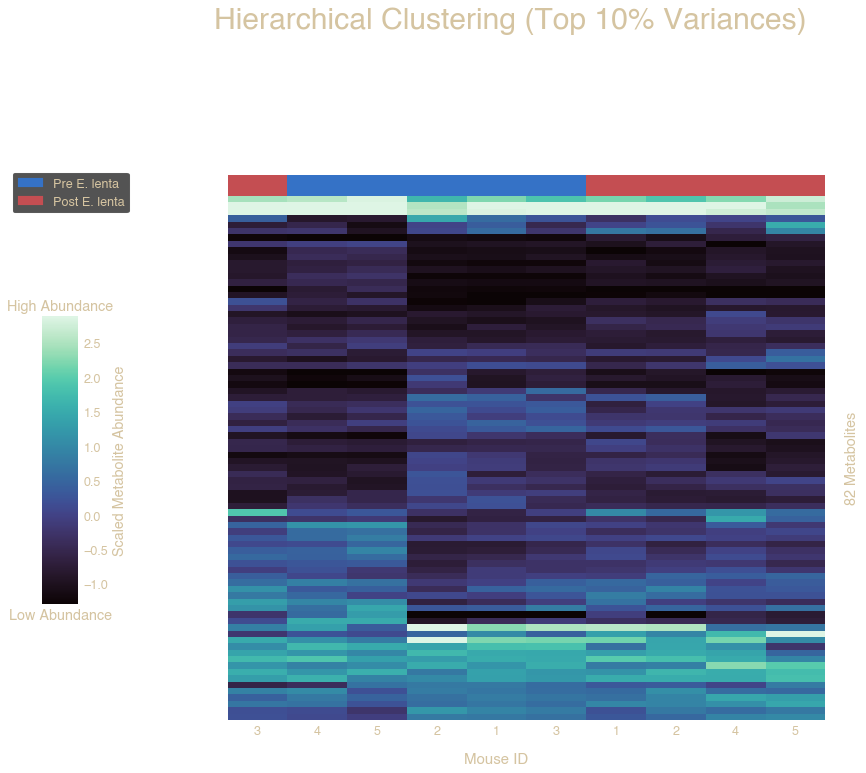

In [213]:
hierarchical(cluster_df_top10, "Hierarchical Clustering (Top 10% Variances)", 
             'HC_10.png', tick=False)

In [215]:
top20 = variances[:int(len(variances) * 0.2)].index.values
cluster_df_top20 = cluster_df.iloc[top20, :]
cluster_df_top20.index.name = '\n{le} Metabolites'.format(le = len(cluster_df_top20))
cluster_df_top20.head()

,1,1,2,2,3,3,4,4,5,5
164 Metabolites,,,,,,,,,,
777,0.388174,0.379516,0.396896,0.474239,0.227633,0.393175,0.200966,0.263762,0.211053,0.179118
549,0.138372,0.001097,0.001452,0.001178,0.120858,0.006964,0.089264,0.195528,0.067820,0.258272
785,0.271211,0.249669,0.238634,0.188524,0.123175,0.186219,0.302018,0.169700,0.425963,0.158792
752,0.112612,0.096876,0.097459,0.041999,0.156780,0.130044,0.094367,0.277683,0.074011,0.276434
820,0.241432,0.078611,0.197009,0.105422,0.328468,0.139020,0.253468,0.159851,0.197046,0.174640


<Figure size 864x864 with 0 Axes>

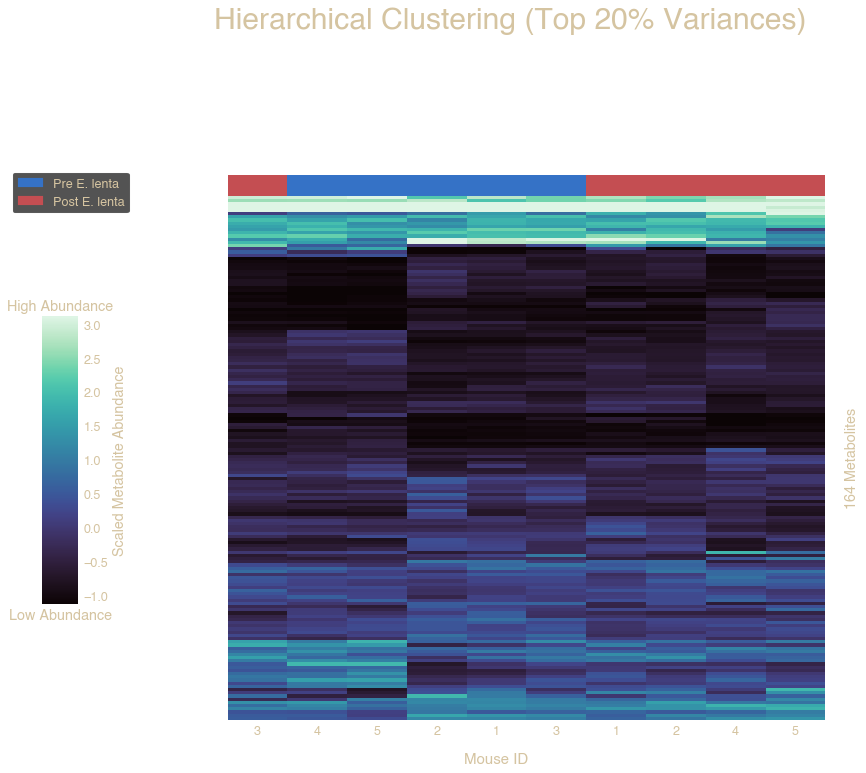

In [217]:
hierarchical(cluster_df_top20, "Hierarchical Clustering (Top 20% Variances)", 'HC_20.png', 
             tick=False)

In [218]:
top50 = variances[:int(len(variances) * 0.5)].index.values
cluster_df_top50 = cluster_df.iloc[top50, :]
cluster_df_top50.index.name = '\n{le} Metabolites'.format(le = len(cluster_df_top50))
cluster_df_top50.head()

,1,1,2,2,3,3,4,4,5,5
411 Metabolites,,,,,,,,,,
777,0.388174,0.379516,0.396896,0.474239,0.227633,0.393175,0.200966,0.263762,0.211053,0.179118
549,0.138372,0.001097,0.001452,0.001178,0.120858,0.006964,0.089264,0.195528,0.067820,0.258272
785,0.271211,0.249669,0.238634,0.188524,0.123175,0.186219,0.302018,0.169700,0.425963,0.158792
752,0.112612,0.096876,0.097459,0.041999,0.156780,0.130044,0.094367,0.277683,0.074011,0.276434
820,0.241432,0.078611,0.197009,0.105422,0.328468,0.139020,0.253468,0.159851,0.197046,0.174640


<Figure size 864x864 with 0 Axes>

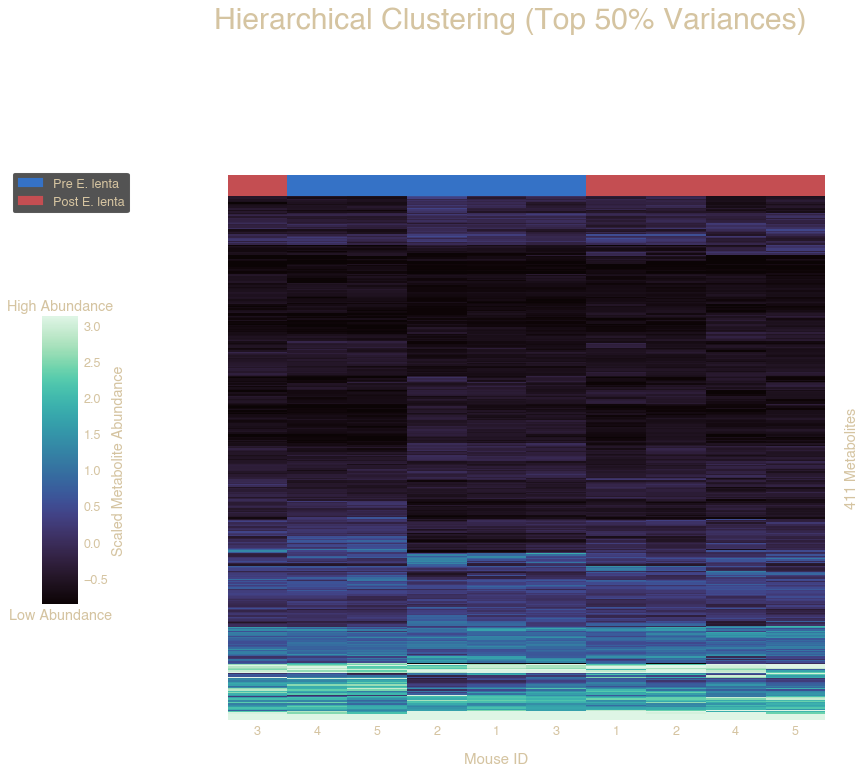

In [219]:
hierarchical(cluster_df_top50, "Hierarchical Clustering (Top 50% Variances)", 'HC_50.png',
             tick=False)

## Box Plots

In [220]:
box_list = [
"myristoleate (14:1n5)",
"palmitoleoyl ethanolamide*",
"deoxycholate",
"serotonin",
"lithocholate",
"alpha-muricholate",
"pyridoxine (Vitamin B6)",
"dihydoxyphenylalanine (L-DOPA)",
"taurocholate",
"docosahexaenoate (DHA; 22:6n3)",
"docosapentaenoate (n3 DPA; 22:5n3)",
"enterodiol",
"oleoyl ethanolamide",
"octadecanedioate (C18-DC)",
"dihomo-linolenate (20:3n3 or n6)",
"tauro-beta-muricholate",
"beta-muricholate",
"hyodeoxycholate",
"stearoyl ethanolamide",
"cholesterol",
"valine",
"pyridoxal",
"campesterol",
"valerate (5:0)",
]
len(box_list)

24

In [221]:
pre = df[df['AfterProbiotic'] == 0]
post = df[df['AfterProbiotic'] == 1]
pre.head()

,AfterProbiotic,(12 or 13)-methylmyristate (a15:0 or i15:0),(14 or 15)-methylpalmitate (a17:0 or i17:0),(16 or 17)-methylstearate (a19:0 or i19:0),(3'-5')-adenylyladenosine*,(3'-5')-adenylylcytidine,(3'-5')-adenylyluridine,(3'-5')-cytidylylcytidine*,(3'-5')-cytidylylguanosine,(3'-5')-cytidylyluridine*,...,sedoheptulose,suberate (C8-DC),succinate,succinimide,threonate,tricarballylate,urate,xylose,mouseID,isMale
0,0,0.097699,0.031264,0.011751,0.002530,0.001595,0.002532,0.002700,0.001522,0.002641,...,0.040729,0.024735,0.347333,0.021981,0.155677,0.241432,0.048367,0.149068,1,1
2,0,0.119596,0.034288,0.011585,0.001485,0.000785,0.001638,0.001818,0.000785,0.001973,...,0.060845,0.033103,0.286650,0.030653,0.116940,0.197009,0.045180,0.168328,2,1
4,0,0.103788,0.037460,0.014543,0.002526,0.002436,0.002764,0.003566,0.000709,0.003389,...,0.034373,0.032385,0.286454,0.028730,0.195996,0.328468,0.057677,0.072740,3,1
6,0,0.178249,0.040164,0.015899,0.003001,0.002235,0.003103,0.003046,0.000941,0.003117,...,0.021816,0.030599,0.344763,0.029454,0.153957,0.253468,0.063587,0.118900,4,0
8,0,0.160207,0.038966,0.013056,0.002832,0.001893,0.003246,0.000934,0.000934,0.002383,...,0.026331,0.027682,0.240438,0.023459,0.121336,0.197046,0.052422,0.287363,5,0


#### Boxplot helper function

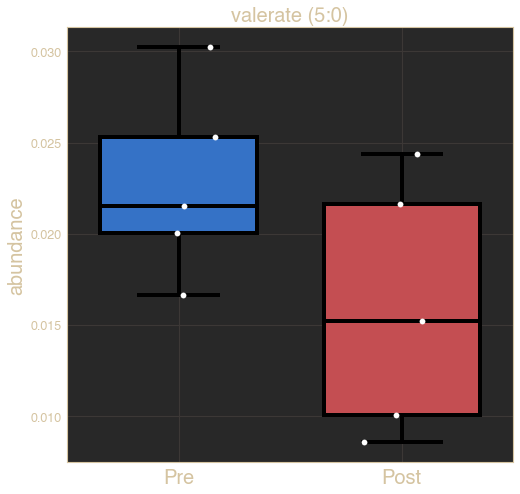

In [222]:
import matplotlib.pyplot as plt

def boxplot(ax, biochem):
    title = biochem if (len(biochem) <= 16) else biochem[:len(biochem) // 2] + "\n-" \
        + biochem[len(biochem) // 2:]
    ax.set_title(title, fontsize=20, wrap=True)
    ax.set_ylabel("abundance", fontsize=20)
    plot = ax.boxplot([pre[biochem], post[biochem]], 
                patch_artist=True, 
                boxprops=dict(facecolor="b", lw=4),
                whiskerprops=dict(lw = 4),
                capprops=dict(lw = 4),
                medianprops=dict(color = 'black', lw = 4),
               widths=0.7)
    ax.set_xticklabels(['Pre', 'Post'], fontsize=20)
    for patch, color in zip(plot['boxes'], ['b', 'r']):
        patch.set_facecolor(color)
    ax.scatter(np.ones((5, 1)) + np.random.randn(5, 1) / 10, pre[biochem], c='w', zorder=10)
    ax.scatter(2 * np.ones((5, 1)) + np.random.randn(5, 1) / 10, post[biochem], c='w', zorder=10)
    
# test on valerate
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
boxplot(ax, 'valerate (5:0)')

plt.savefig('../output/boxplot_example.png')
plt.show()

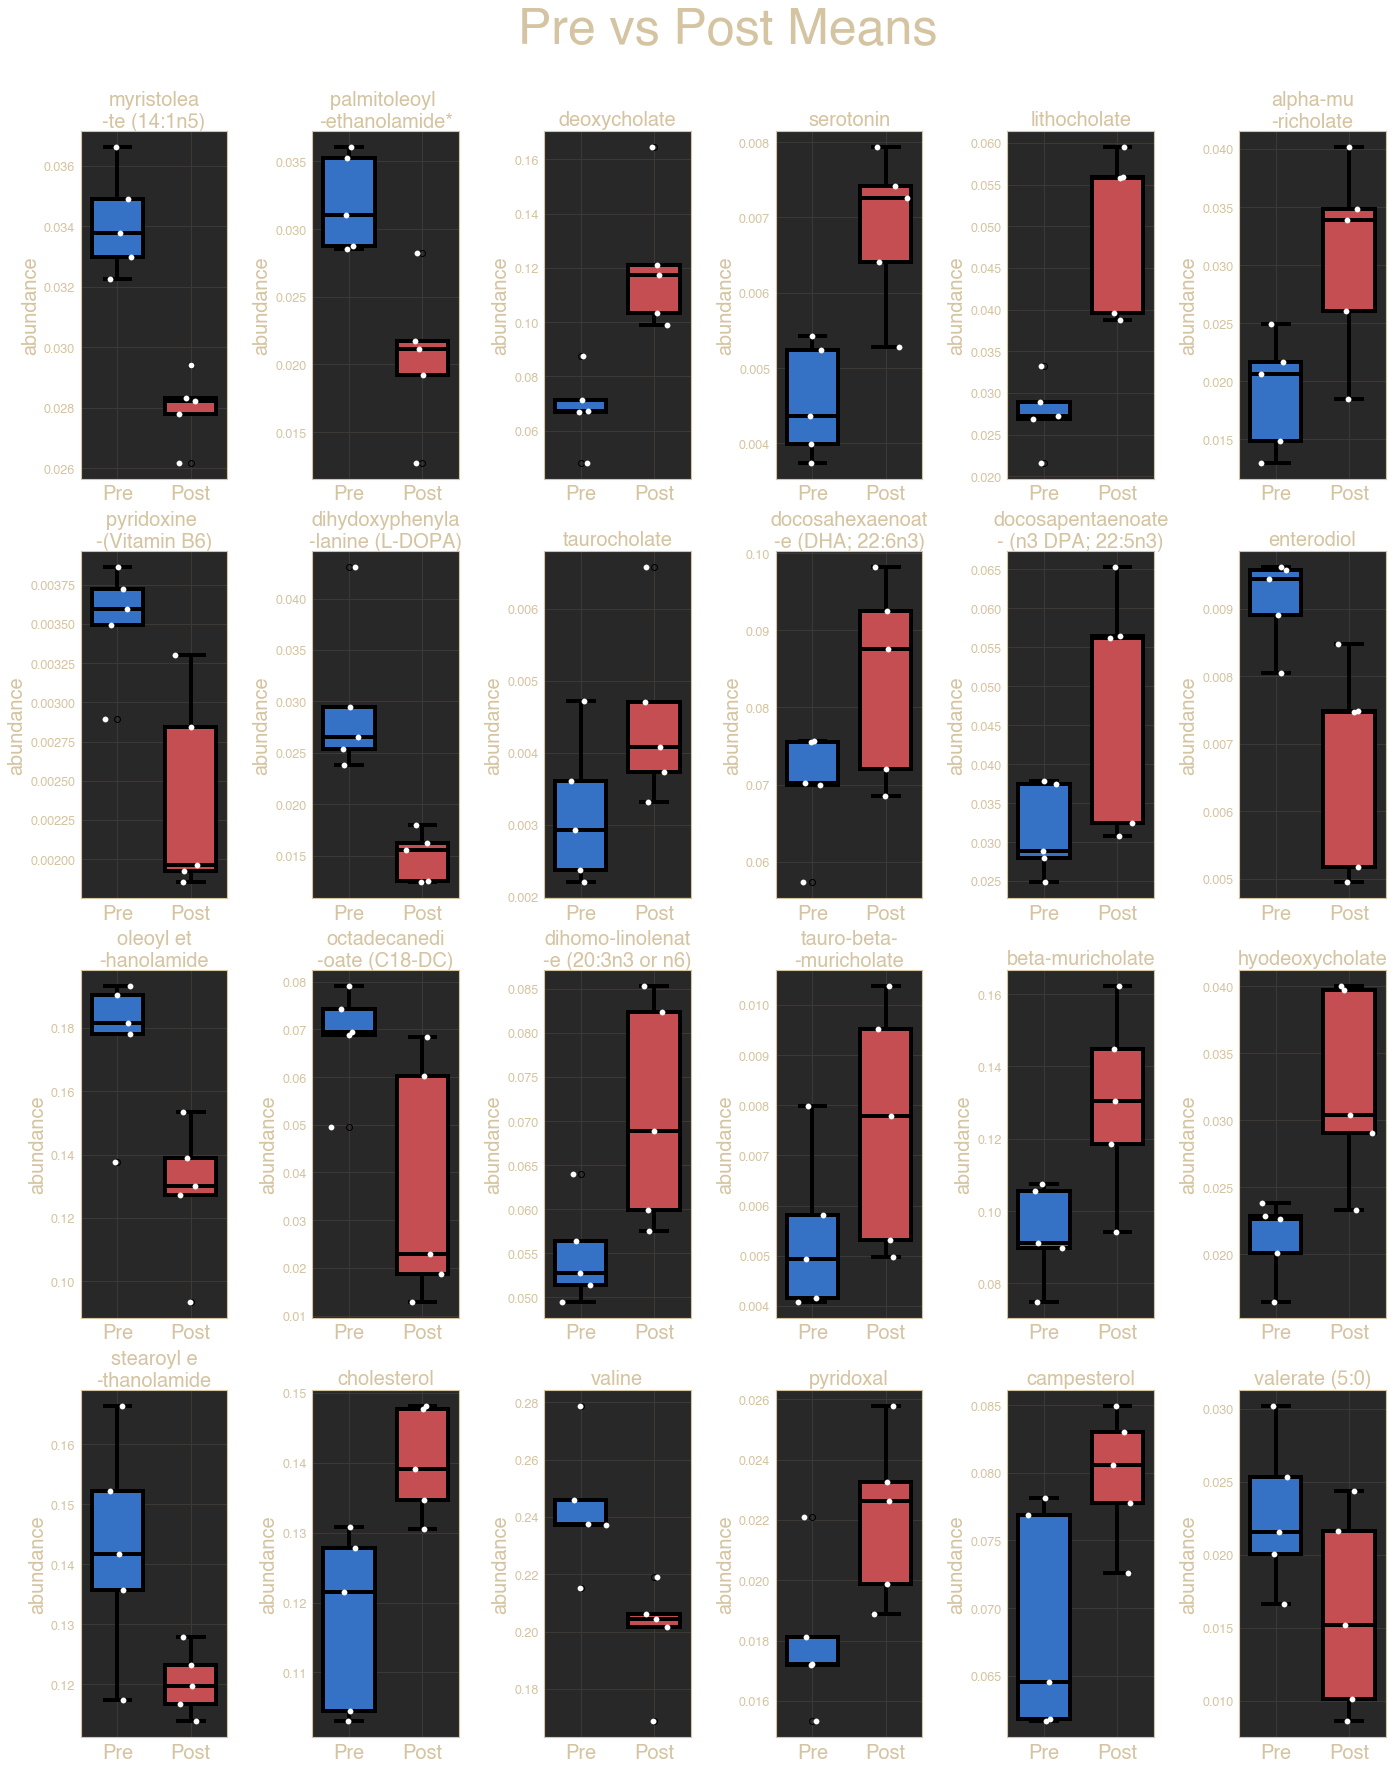

In [260]:
from matplotlib.pyplot import figure

fig, axs = plt.subplots(4,6,figsize=(20, 24))

fig.tight_layout(pad=5)

for ax, biochem in zip(axs.flat, box_list):
    boxplot(ax, biochem)
    
plt.figtext(.5, 1.02,'Pre vs Post Means',fontsize=50,ha='center')

plt.savefig('../output/boxplots.png', bbox_inches="tight")
plt.show()

#### Find the 16 metabolites that increased the most

In [248]:
difs = df.iloc[[0], 1:-2].copy().T
difs.iloc[:, 0] = (post.iloc[:, 1:-2].to_numpy() - pre.iloc[:, 1:-2].to_numpy()).sum(axis=0)
difs

,0
(12 or 13)-methylmyristate (a15:0 or i15:0),0.025695
(14 or 15)-methylpalmitate (a17:0 or i17:0),-0.012759
(16 or 17)-methylstearate (a19:0 or i19:0),-0.003573
(3'-5')-adenylyladenosine*,-0.005555
(3'-5')-adenylylcytidine,-0.003215
...,...
succinimide,-0.002077
threonate,-0.068213
tricarballylate,-0.559878
urate,0.037398


In [247]:
# correctness check
post.iloc[:, 1].sum() - pre.iloc[:, 1].sum()

0.025694532954949167

In [256]:
difs.sort_values(by=0).head()

,0
tricarballylate,-0.559878
lactate,-0.408097
arabonate/xylonate,-0.320422
sphingadienine,-0.248941
oleoyl ethanolamide,-0.237125


In [257]:
sortedDifs = difs.sort_values(by=0).index.values
sortedDifs[:10]

array(['tricarballylate', 'lactate', 'arabonate/xylonate',
       'sphingadienine', 'oleoyl ethanolamide', 'citrate', 'xylose',
       '2-isopropylmalate', 'valine', 'arabinose'], dtype=object)

In [263]:
increased = sortedDifs[-16:]
decreased = sortedDifs[:16]
assert(len(increased) == 16 and len(decreased) == 16)

## Boxplots for Metabolites that increased

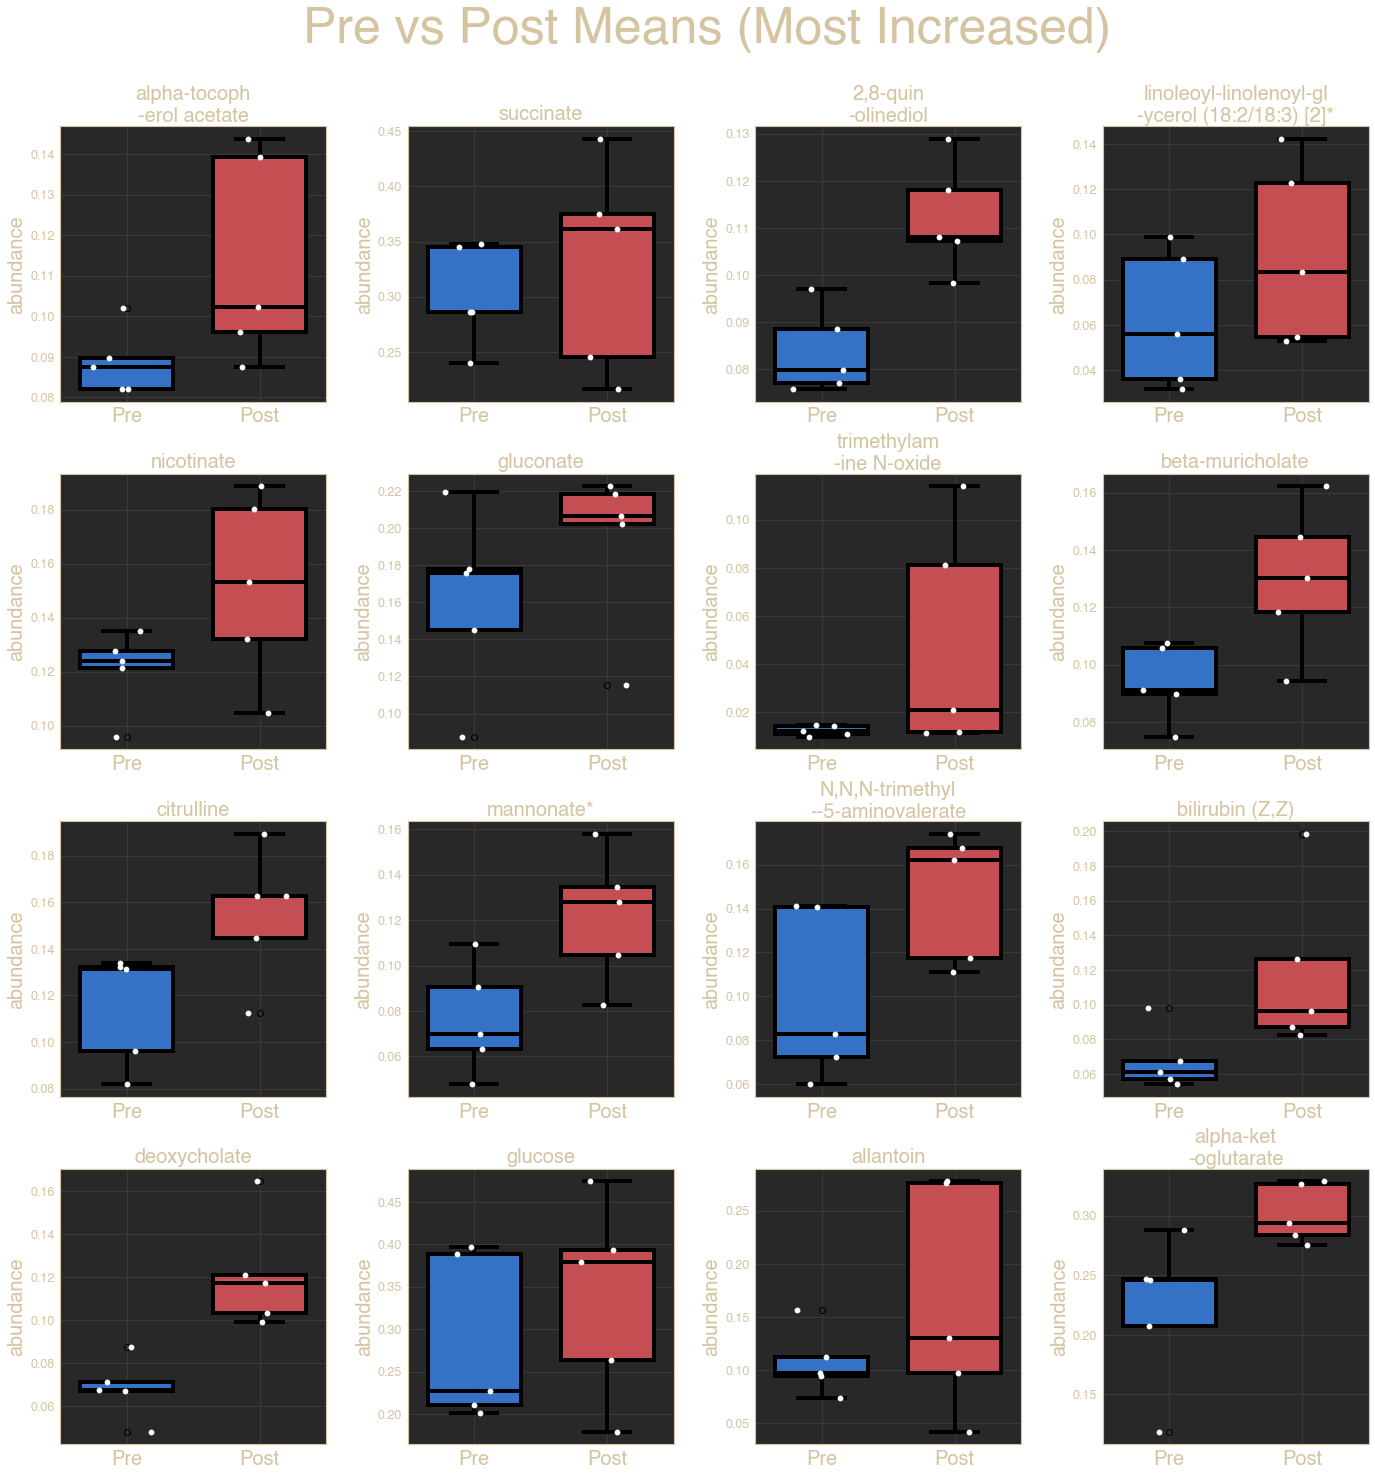

In [266]:
fig, axs = plt.subplots(4,4,figsize=(20, 20))

fig.tight_layout(pad=5)

for ax, biochem in zip(axs.flat, increased):
    boxplot(ax, biochem)
    
plt.figtext(.5, 1.02,'Pre vs Post Means (Most Increased)',fontsize=50,ha='center')

plt.savefig('../output/boxplots_increased.png', bbox_inches="tight")
plt.show()

## Boxplots for metabolites that decreased

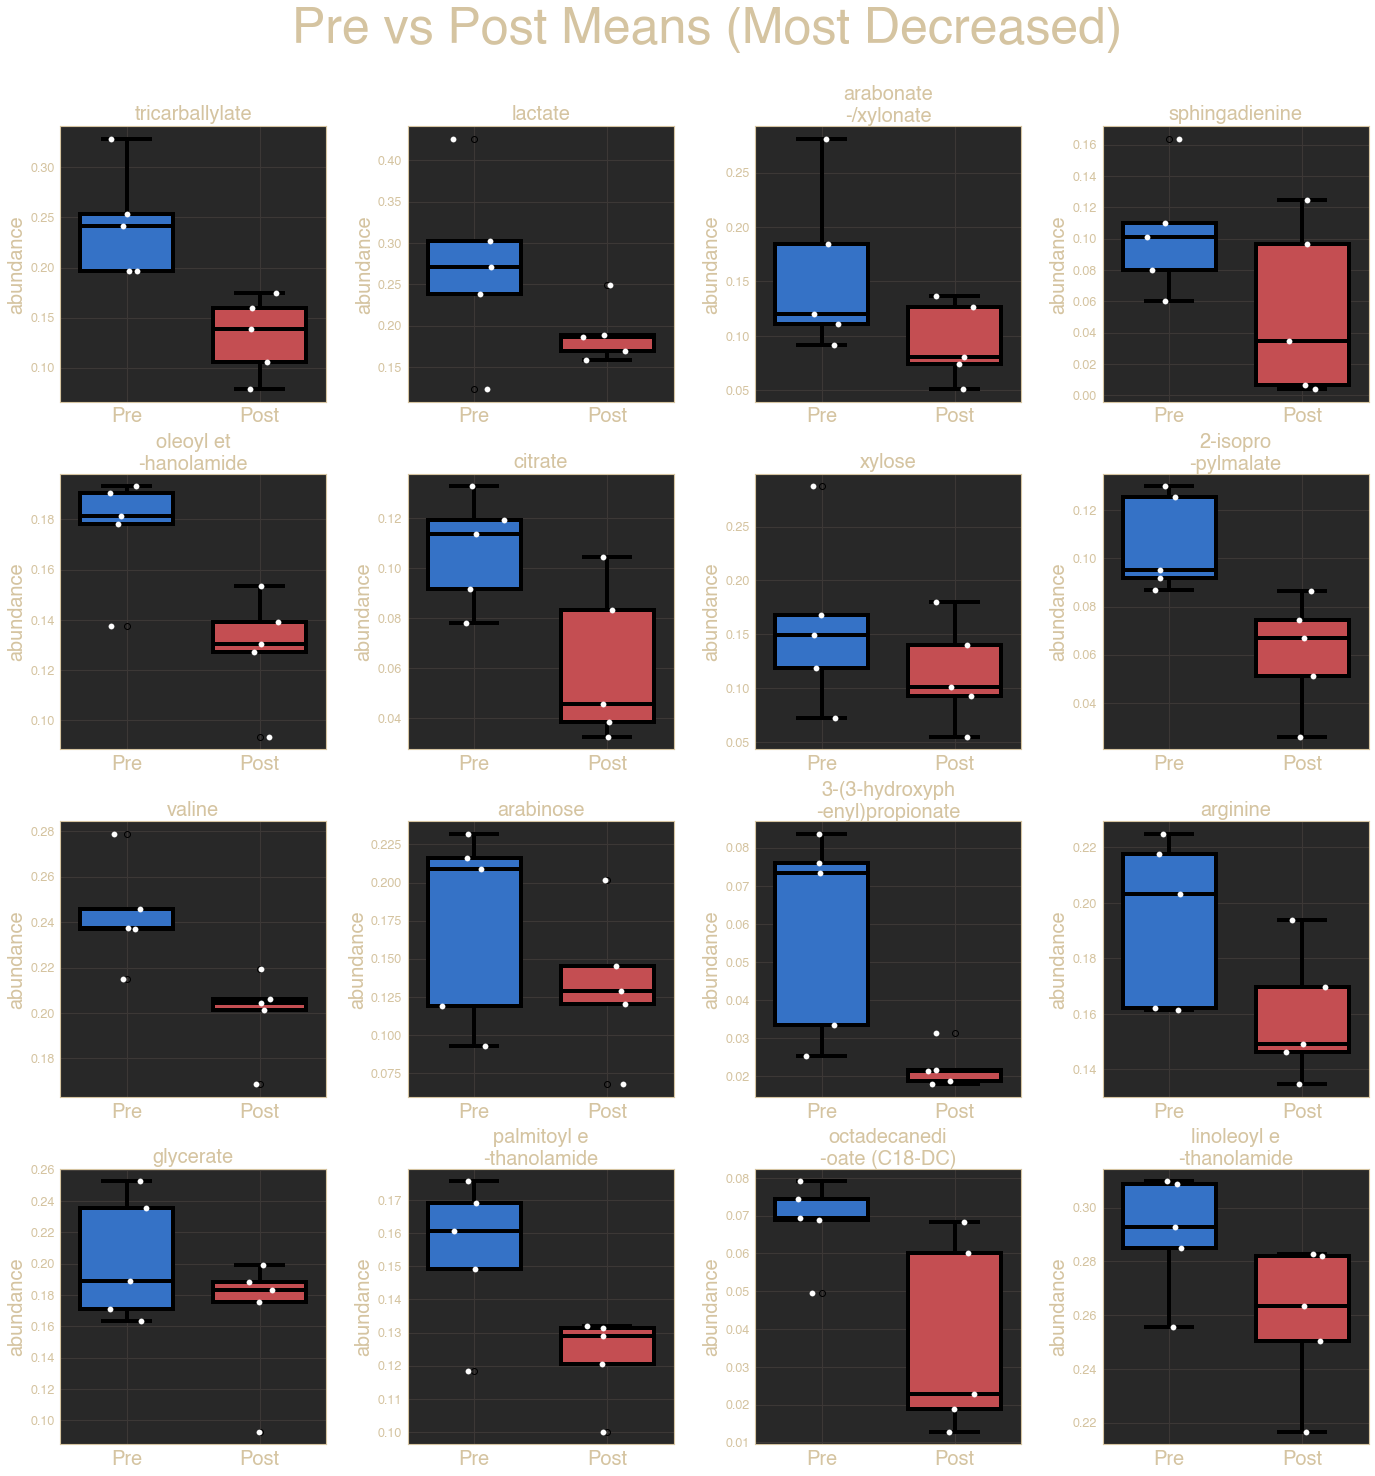

In [267]:
fig, axs = plt.subplots(4,4,figsize=(20, 20))

fig.tight_layout(pad=5)

for ax, biochem in zip(axs.flat, decreased):
    boxplot(ax, biochem)
    
plt.figtext(.5, 1.02,'Pre vs Post Means (Most Decreased)',fontsize=50,ha='center')

plt.savefig('../output/boxplots_decreased.png', bbox_inches="tight")
plt.show()